# <font color='green' style='font-size: 38px; font-weight: bold'>Data Science - Análises de Filmes</font>
<hr style='border: 5px solid red;'>


## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/tmdb/tmdb-movie-metadata e https://grouplens.org/datasets/movielens/

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Análises de filmes no dataset baixado do Kaggle (tmdb 5000) e do MovieLens (100k), para aprendizado em Data Science com orientação do curso da Alura: Data Science Introdução a testes estatísticos com Python. Seguirei a orientação do instrutor Guilherme Silveira co-fundou a Caelum, a Alura e o GUJ. Com mais de 15 anos de experiência no ensino de programação e habilidades digitais, coordena as equipes de produção de cursos na Alura. É tecnólogo com viés matemático e medalhista de ouro em competições nacionais de computação, representando o Brasil nos mundiais. Participante ativo da comunidade open source e de educação em tecnologia, autor de 7 livros da área.</p>




## Leitura dos dados

In [1]:
import pandas as pd

In [2]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Visualizando os dados:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Percebemos alguns números que merecem uma atenção especial. Os valores mínimos e máximos para o valor da nota atribuida ao filme, será que realmente foram notas 0 e 10? Ou foram valores que deveremos limpar do dataset, pois não foram votados e/ou sem uma representação significativa?</p>


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

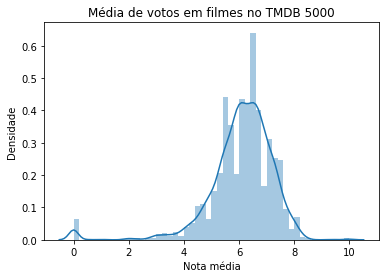

In [4]:
import seaborn as sns

ax = sns.distplot(tmdb.vote_average)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title("Média de votos em filmes no TMDB 5000")

Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

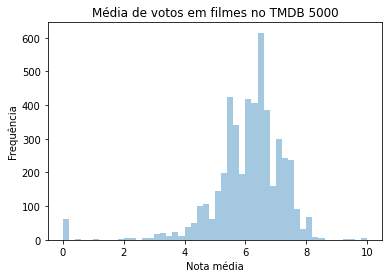

In [5]:
ax = sns.distplot(tmdb.vote_average, norm_hist = False, kde = False)
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title("Média de votos em filmes no TMDB 5000")

Text(0.5, 1.0, 'Distribuição de nota média dos filmes do TMDB 5000')

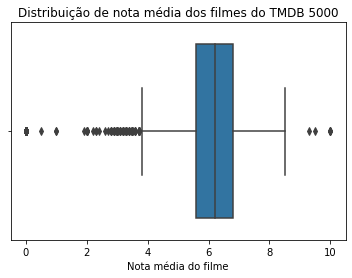

In [6]:
ax = sns.boxplot(x=tmdb.vote_average)
ax.set(xlabel="Nota média do filme")
ax.set_title("Distribuição de nota média dos filmes do TMDB 5000")

In [7]:
tmdb.query("vote_average == 0").head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0


In [8]:
tmdb.query("vote_average==10").head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1


### Analisando os dados:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Com essas análises percebemos que alguns filmes tiveram poucos votos ou até mesmo nenhum voto. Portanto, excluiremos esses filmes do nosso dataset, pois não faram parte das nossas análises</p>


In [9]:
tmdb_com_mais_de_10_votos = tmdb.query("vote_count >= 10")
tmdb_com_mais_de_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos')

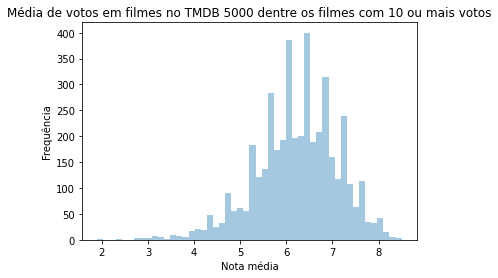

In [10]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average, norm_hist = False, kde = False)
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title("Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos")

Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos')

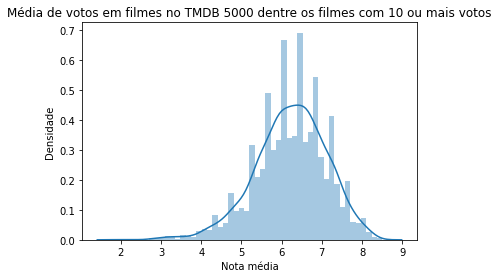

In [11]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title("Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos")

Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000 com 10 ou mais votos')

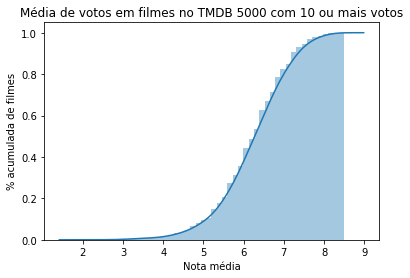

In [12]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average,
                          hist_kws = {'cumulative':True},
                          kde_kws = {'cumulative':True})
ax.set(xlabel="Nota média", ylabel="% acumulada de filmes")
ax.set_title("Média de votos em filmes no TMDB 5000 com 10 ou mais votos")

### Analisando os dados do Movielens:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Faremos a análise das notas para os filmes na plataforma Movielens</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Analisando de forma Acumulativa podemos visualmente perceber o quanto o filme está melhor votado em relação a outros filmes.</p>

In [13]:
notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [14]:
nota_media_por_filme = notas.groupby("movieId").mean()["rating"]
nota_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

Text(0.5, 1.0, 'Média de votos em filmes no Movielens 100k')

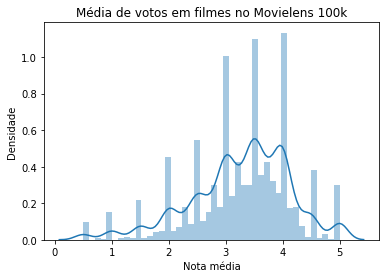

In [15]:
ax = sns.distplot(nota_media_por_filme.values)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title("Média de votos em filmes no Movielens 100k")

In [16]:
quantidade_de_votos_por_filme = notas.groupby("movieId").count()
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filme.query("rating >= 10").index
filmes_com_pelo_menos_10_votos.values

array([     1,      2,      3, ..., 177765, 179819, 187593])

In [17]:
nota_media_dos_filmes_com_pelo_menos_10_votos = nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos.values]
nota_media_dos_filmes_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

Text(0.5, 1.0, 'Média de votos em filmes no Movielens 100k com 10 ou mais votos')

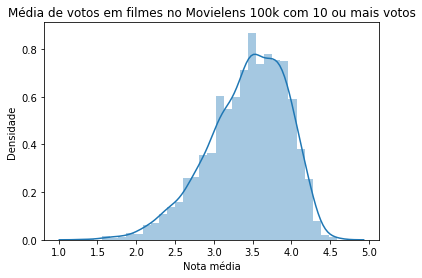

In [18]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title("Média de votos em filmes no Movielens 100k com 10 ou mais votos")

Text(0.5, 1.0, 'Distribuição de nota média dos filmes do MovieLens 100k dentre os filmes com 10 ou mais votos')

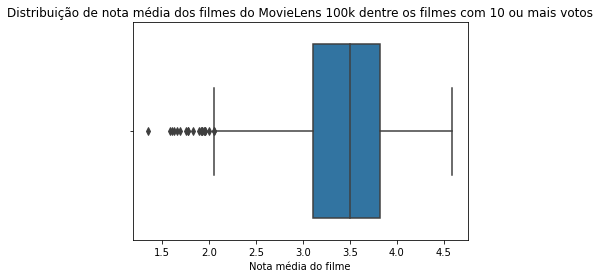

In [19]:
ax = sns.boxplot(x=nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel="Nota média do filme")
ax.set_title("Distribuição de nota média dos filmes do MovieLens 100k dentre os filmes com 10 ou mais votos")

Text(0.5, 1.0, 'Média de votos em filmes no Movielens 100k com 10 ou mais votos')

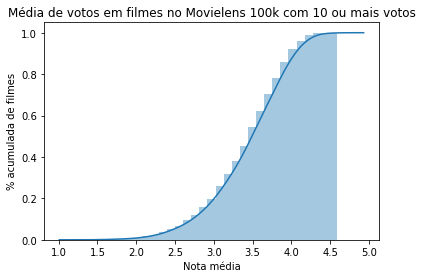

In [20]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values,
                          hist_kws = {'cumulative':True},
                          kde_kws = {'cumulative':True})
ax.set(xlabel="Nota média", ylabel="% acumulada de filmes")
ax.set_title("Média de votos em filmes no Movielens 100k com 10 ou mais votos")

# Analisando a distribuição dos dados capturados de outros campos do TMDB

Text(0.5, 1.0, 'Número de votos em filmes no TMDB 5000 com 10 ou mais votos')

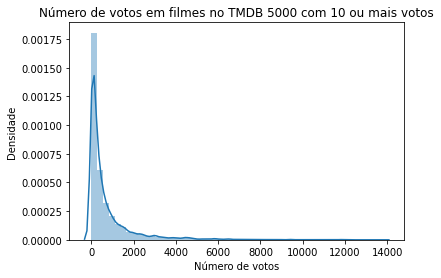

In [21]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_count)
ax.set(xlabel="Número de votos", ylabel="Densidade")
ax.set_title("Número de votos em filmes no TMDB 5000 com 10 ou mais votos")

Text(0.5, 1.0, 'Gastos em filmes no TMDB 5000')

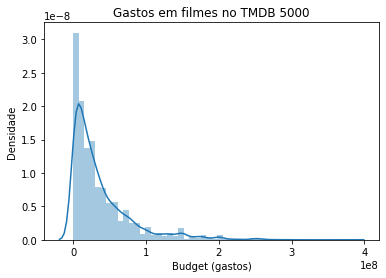

In [22]:
ax = sns.distplot(tmdb.query("budget > 0").budget)
ax.set(xlabel="Budget (gastos)", ylabel="Densidade")
ax.set_title("Gastos em filmes no TMDB 5000")

Text(0.5, 1.0, 'Popularidade em filmes no TMDB 5000')

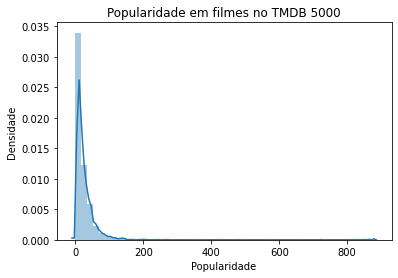

In [23]:
ax = sns.distplot(tmdb.popularity)
ax.set(xlabel="Popularidade", ylabel="Densidade")
ax.set_title("Popularidade em filmes no TMDB 5000")

Text(0.5, 1.0, 'Tempo de duração em filmes no TMDB 5000')

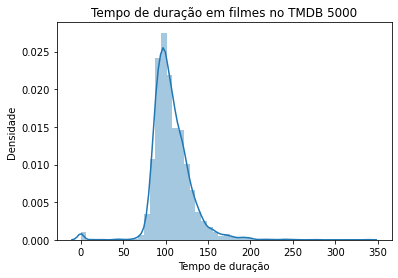

In [24]:
ax = sns.distplot(tmdb.runtime)
ax.set(xlabel="Tempo de duração", ylabel="Densidade")
ax.set_title("Tempo de duração em filmes no TMDB 5000")


In [25]:
tmdb.runtime.isnull().sum()

2

Text(0.5, 1.0, 'Tempo de duração em filmes no TMDB 5000')

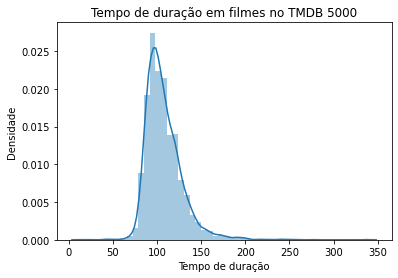

In [26]:
ax = sns.distplot(tmdb.query("runtime>0").runtime.dropna())
ax.set(xlabel="Tempo de duração", ylabel="Densidade")
ax.set_title("Tempo de duração em filmes no TMDB 5000")

Text(0.5, 1.0, 'Tempo de duração em filmes no TMDB 5000')

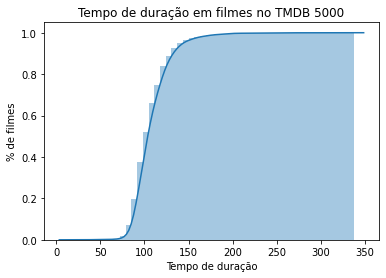

In [27]:
ax = sns.distplot(tmdb.query("runtime>0").runtime.dropna(),
                 hist_kws={'cumulative': True},
                 kde_kws={'cumulative': True}
                 )
ax.set(xlabel="Tempo de duração", ylabel="% de filmes")
ax.set_title("Tempo de duração em filmes no TMDB 5000")


In [28]:
tmdb.query("runtime>0").runtime.dropna().quantile(0.8)

121.0

# Movielens: média dos filmes com pelo menos 10 votos

Analisar a média da nota para os filmes tem relação direta com o tamanho da amostra. Um dado estatístico relevante pois será que a amostra é representativa da população? O gráfico abaixo demonstra isso, quanto maior o número de votos analisados, mais representativo a média será.

In [29]:
print("Média dos filmes com pelo menos 10 votos", nota_media_dos_filmes_com_pelo_menos_10_votos.mean())

Média dos filmes com pelo menos 10 votos 3.4320503405352603


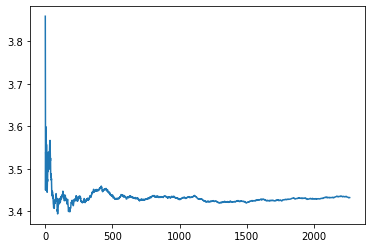

In [30]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(75243)
temp = nota_media_dos_filmes_com_pelo_menos_10_votos.sample(frac=1)

medias = [temp[0:i].mean() for i in range(1, len(temp))]

plt.plot(medias)

In [31]:
from statsmodels.stats.weightstats import zconfint

zconfint(nota_media_dos_filmes_com_pelo_menos_10_votos)

(3.4112459477469557, 3.452854733323563)

In [32]:
from statsmodels.stats.weightstats import DescrStatsW

descr_todos_com_10_votos = DescrStatsW(nota_media_dos_filmes_com_pelo_menos_10_votos)
descr_todos_com_10_votos.tconfint_mean()

(3.411234839229381, 3.4528658418411395)

# Vamos ver o filme Toy Story

É importante avaliar visualmente através de gráficos como distplot e boxplot, e através dos números como teste Z, intervalo de confiança, teste de hipótese.

In [34]:
filmes = pd.read_csv("movies.csv")
filmes.query("movieId==1")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [35]:
notas1 = notas.query("movieId == 1")
notas1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


Text(0.5, 1.0, 'Distribuição das notas para o Toy Story')

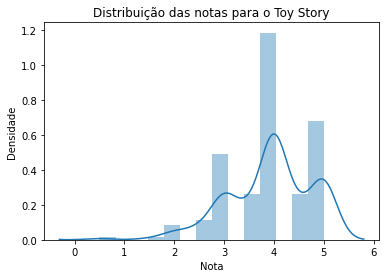

In [36]:
ax = sns.distplot(notas1.rating)
ax.set(xlabel="Nota", ylabel="Densidade")
ax.set_title("Distribuição das notas para o Toy Story")

Text(0.5, 1.0, 'Distribuição das notas para o Toy Story')

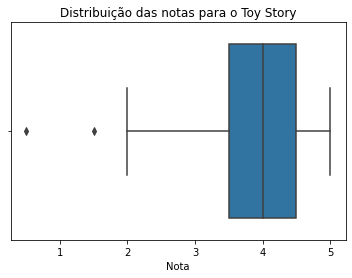

In [37]:
ax = sns.boxplot(notas1.rating)
ax.set(xlabel="Nota")
ax.set_title("Distribuição das notas para o Toy Story")

In [38]:
notas1.rating.mean()

3.9209302325581397

In [39]:
notas1.rating.count()

215

In [40]:
zconfint(notas1.rating)

(3.8093359183563402, 4.032524546759939)

In [41]:
from statsmodels.stats.weightstats import ztest

ztest(notas1.rating, value = 3.4320503405352594)

(8.586342305916732, 8.978190401885648e-18)

A importância do tamanhoa da amostra, inicialmente podemos interpretar com poucas amostras que o filme Toy Story está com a mesma média de outros filmes, aceitando a Ho (hipótese nula), porém com uma amostra significativa percebemos que a nota média do filme Toy Story é superior a média das notas de outros filmes. Como mostra o gráfico, o P-value <= 0.05.

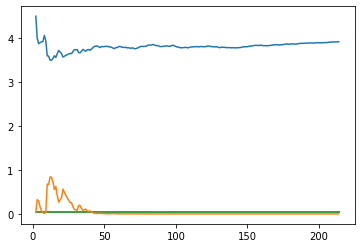

In [45]:
np.random.seed(75241)
temp = notas1.sample(frac=1).rating

def calcula_teste(i):
  media = temp[0:i].mean()
  stat, p = ztest(temp[0:i], value = 3.4320503405352594)
  return (i,media, p)

valores = np.array([calcula_teste(i) for i in range(2, len(temp))])

plt.plot(valores[:,0], valores[:,1])
plt.plot(valores[:,0], valores[:,2])
plt.hlines(y = 0.05, xmin = 2, xmax = len(temp), colors='g')

# Comparação de dois conjuntos de amostras

Vamos comparar o valor médio das notas do Toy Story, não somente com um valor específico, mas com um valor em relação a média de notas dos outros filmes. O intervalo de confiança ficará em 0.27 a 0.55

In [46]:
print(ztest(notas1.rating, notas.rating))
zconfint(notas1.rating, notas.rating)

(5.894327101501841, 3.762112778881965e-09)


(0.2799245129192442, 0.5588219849631111)

In [47]:
print(ztest(notas.rating, notas1.rating))
zconfint(notas.rating, notas1.rating)

(-5.894327101501841, 3.762112778881965e-09)


(-0.5588219849631111, -0.2799245129192442)

In [48]:
from scipy.stats import ttest_ind

ttest_ind(notas.rating, notas1.rating)

Ttest_indResult(statistic=-5.894327101501841, pvalue=3.774003138720876e-09)

In [49]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1.rating)
comparacao = descr_todas_as_notas.get_compare(descr_toystory)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


In [52]:
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

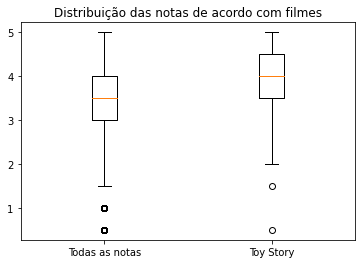

In [53]:
import matplotlib.pyplot as plt

plt.boxplot([notas.rating, notas1.rating], labels=["Todas as notas", "Toy Story"])
plt.title("Distribuição das notas de acordo com filmes")

Veja o que acontece se pegarmos uma amostra pequena das notas atribuidas ao Toy Story, veremos que a média da nota comparada com outros filmes aparentemente é a mesma. Por isso é importante ter uma amostra significativa para análises.

Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

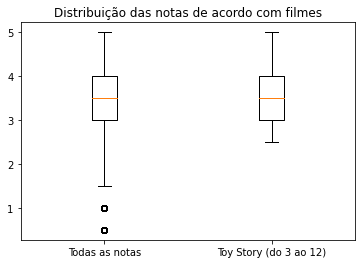

In [54]:
plt.boxplot([notas.rating, notas1[3:12].rating], labels=["Todas as notas", "Toy Story (do 3 ao 12)"])
plt.title("Distribuição das notas de acordo com filmes")

In [55]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1[3:12].rating)
comparacao = descr_todas_as_notas.get_compare(descr_toystory)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0540,0.348,-0.155,0.877,-0.735,0.627


# Comparar a média de dois filmes

Análise gráfica, quantidade de votos, p-value e intervalo de confiança.


In [56]:
filmes.query("movieId in [1, 593, 72226]")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


Text(0.5, 1.0, 'Distribuição das notas de acordo com os filmes')

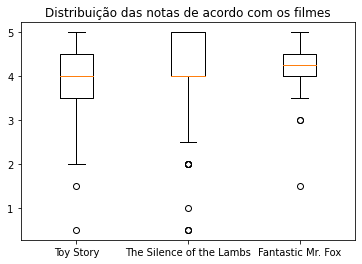

In [57]:
notas1 = notas.query("movieId == 1")
notas593 = notas.query("movieId == 593")
notas72226 = notas.query("movieId == 72226")

plt.boxplot([notas1.rating, notas593.rating, notas72226.rating], labels=["Toy Story", "The Silence of the Lambs", "Fantastic Mr. Fox"])
plt.title("Distribuição das notas de acordo com os filmes")

In [58]:
notas72226.describe()

,userId,movieId,rating,timestamp
count,18.000000,18.0,18.000000,1.800000e+01
mean,329.722222,72226.0,4.083333,1.395218e+09
std,174.748157,0.0,0.895249,9.459862e+07
min,73.000000,72226.0,1.500000,1.262899e+09
25%,167.000000,72226.0,4.000000,1.279706e+09
50%,326.000000,72226.0,4.250000,1.441777e+09
75%,466.250000,72226.0,4.500000,1.471770e+09
max,610.000000,72226.0,5.000000,1.498522e+09


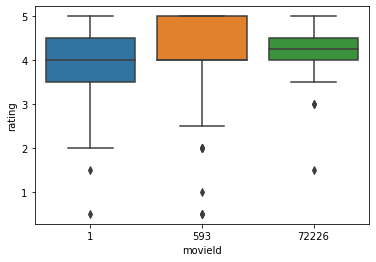

In [59]:
sns.boxplot(x = "movieId", y = "rating", data = notas.query("movieId in (1, 593, 72226)"))

In [60]:
notas.query("movieId in (1, 593, 72226)").groupby("movieId").count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
593,279,279,279
72226,18,18,18


In [61]:
descr_1 = DescrStatsW(notas1.rating)
descr_593 = DescrStatsW(notas593.rating)
comparacao = descr_1.get_compare(descr_593)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.2404,0.077,-3.132,0.002,-0.391,-0.090


In [62]:
descr_72226 = DescrStatsW(notas72226.rating)
descr_593 = DescrStatsW(notas593.rating)
comparacao = descr_72226.get_compare(descr_593)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0780,0.208,-0.374,0.708,-0.488,0.332


In [63]:
comparacao = descr_1.get_compare(descr_72226)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.1624,0.206,-0.788,0.431,-0.568,0.243


Como é que podemos garantir que os dados das nossas notas se comportam como uma distribuição normal? 

Repare que, quando trabalhamos com Teste T e Teste Z estávamos nos referindo às médias - o que fazia sentido em uma distribuição normal. Porém, em uma distribuição não paramétrica, não usamos as médias, mas sim amostras aleatórias de cada conjunto testado.

Análises como essa, junto com as médias, os boxplots, os histogramas e outras informações que aprendemos a testar anteriormente, nos permitem concluir quando um filme é melhor que outro.

In [64]:
from scipy.stats import normaltest

stats , p = normaltest(notas1.rating)
p

0.00011053430732728716

In [65]:
from scipy.stats import ranksums

_, p = ranksums(notas1.rating, notas593.rating)
p

0.0003267718756440693